Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5556 - loss: 0.6918 - val_accuracy: 0.6111 - val_loss: 0.6507
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.6184 - val_accuracy: 0.6111 - val_loss: 0.6312
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7222 - loss: 0.5612 - val_accuracy: 0.7222 - val_loss: 0.5972
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7778 - loss: 0.5082 - val_accuracy: 0.6667 - val_loss: 0.5677
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9444 - loss: 0.4510 - val_accuracy: 0.6111 - val_loss: 0.5536
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8889 - loss: 0.4438 - val_accuracy: 0.7222 - val_loss: 0.5352
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9444 - loss: 0.3888 - val_accuracy: 0.8333 - val_loss: 0.5310
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 

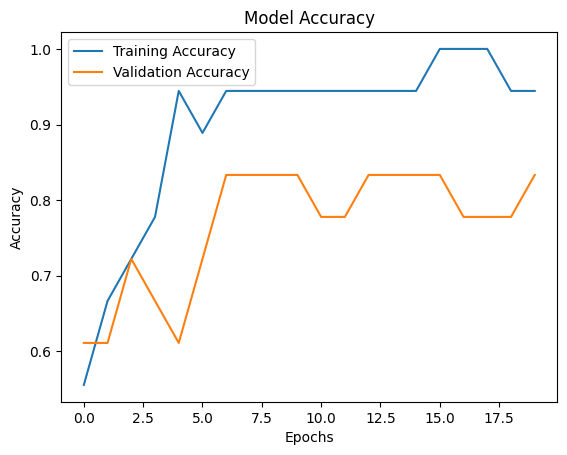

In [28]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from config import TRAIN_DATA_DIR, VALID_DATA_DIR

# Define paths to training and validation data
train_data_dir = TRAIN_DATA_DIR
valid_data_dir = VALID_DATA_DIR

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_EPOCHS = 20

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

# Load the VGG16 model pre-trained on ImageNet without the top layer
base_model = VGG16(weights='imagenet', include_top=False)


# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer -- the output layer
predictions = Dense(1, activation='sigmoid')(x)

# Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE)

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

